### Stock Market Prediction And Forecasting Using Stacked LSTM

In [6]:
### Keras and Tensorflow >2.0

In [7]:
import pandas as pd

In [8]:
df = pd.read_excel('/content/Company stock prices.xlsx')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900
...,...,...,...,...,...,...,...
748,2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900
749,2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400
750,2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100
751,2023-10-13,355.640015,358.929993,352.049988,355.679993,355.679993,6312600


In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
748,2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900
749,2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400
750,2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100
751,2023-10-13,355.640015,358.929993,352.049988,355.679993,355.679993,6312600
752,2023-10-16,356.209991,363.079987,354.769989,360.820007,360.820007,5119100


In [11]:
df1=df.reset_index()['Close']

In [12]:
df1

0      530.719971
1      525.419983
2      489.049988
3      485.230011
4      488.279999
          ...    
748    373.320007
749    365.929993
750    361.200012
751    355.679993
752    360.820007
Name: Close, Length: 753, dtype: float64

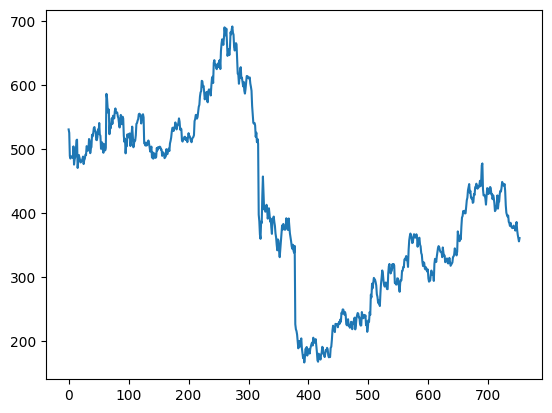

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [15]:
import numpy as np

In [16]:
df1

0      530.719971
1      525.419983
2      489.049988
3      485.230011
4      488.279999
          ...    
748    373.320007
749    365.929993
750    361.200012
751    355.679993
752    360.820007
Name: Close, Length: 753, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.69357719]
 [0.68348813]
 [0.61425415]
 [0.60698243]
 [0.6127884 ]
 [0.61271223]
 [0.61402572]
 [0.60890503]
 [0.64311275]
 [0.58891721]
 [0.6048694 ]
 [0.61077058]
 [0.62929265]
 [0.66129218]
 [0.66313862]
 [0.57894236]
 [0.59748342]
 [0.61750935]
 [0.60991394]
 [0.6024328 ]
 [0.59531335]
 [0.59822585]
 [0.60043404]
 [0.60591642]
 [0.61271223]
 [0.59059239]
 [0.60250896]
 [0.60654458]
 [0.61865146]
 [0.61739514]
 [0.64381708]
 [0.64153279]
 [0.63037765]
 [0.63188152]
 [0.6651375 ]
 [0.65919815]
 [0.62291557]
 [0.63717353]
 [0.64122821]
 [0.67777732]
 [0.6727519 ]
 [0.68236507]
 [0.69772715]
 [0.70067771]
 [0.69013168]
 [0.68712407]
 [0.66266272]
 [0.66169187]
 [0.67149546]
 [0.69386278]
 [0.68190822]
 [0.71263226]
 [0.67861491]
 [0.6746935 ]
 [0.63603135]
 [0.65202165]
 [0.65489605]
 [0.63338538]
 [0.6241529 ]
 [0.64992768]
 [0.63673568]
 [0.63125335]
 [0.63846796]
 [0.79945562]
 [0.78708221]
 [0.75915629]
 [0.74318516]
 [0.75298864]
 [0.67941451]
 [0.70857758]
 [0.69675629]
 [0.70

In [19]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(527, 226)

In [21]:
train_data

array([[0.69357719],
       [0.68348813],
       [0.61425415],
       [0.60698243],
       [0.6127884 ],
       [0.61271223],
       [0.61402572],
       [0.60890503],
       [0.64311275],
       [0.58891721],
       [0.6048694 ],
       [0.61077058],
       [0.62929265],
       [0.66129218],
       [0.66313862],
       [0.57894236],
       [0.59748342],
       [0.61750935],
       [0.60991394],
       [0.6024328 ],
       [0.59531335],
       [0.59822585],
       [0.60043404],
       [0.60591642],
       [0.61271223],
       [0.59059239],
       [0.60250896],
       [0.60654458],
       [0.61865146],
       [0.61739514],
       [0.64381708],
       [0.64153279],
       [0.63037765],
       [0.63188152],
       [0.6651375 ],
       [0.65919815],
       [0.62291557],
       [0.63717353],
       [0.64122821],
       [0.67777732],
       [0.6727519 ],
       [0.68236507],
       [0.69772715],
       [0.70067771],
       [0.69013168],
       [0.68712407],
       [0.66266272],
       [0.661

In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(426, 100)
(426,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(125, 100)
(125,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Epoch 1/150
7/7 [==============================] - 11s 393ms/step - loss: 0.1457 - val_loss: 0.0518
Epoch 2/150
7/7 [==============================] - 1s 186ms/step - loss: 0.0320 - val_loss: 0.0090
Epoch 3/150
7/7 [==============================] - 1s 193ms/step - loss: 0.0238 - val_loss: 0.0062
Epoch 4/150
7/7 [==============================] - 1s 184ms/step - loss: 0.0147 - val_loss: 0.0026
Epoch 5/150
7/7 [==============================] - 2s 295ms/step - loss: 0.0106 - val_loss: 0.0031
Epoch 6/150
7/7 [==============================] - 2s 258ms/step - loss: 0.0082 - val_loss: 0.0030
Epoch 7/150
7/7 [==============================] - 1s 185ms/step - loss: 0.0068 - val_loss: 0.0042
Epoch 8/150
7/7 [==============================] - 1s 186ms/step - loss: 0.0065 - val_loss: 0.0032
Epoch 9/150
7/7 [==============================] - 1s 185ms/step - loss: 0.0059 - val_loss: 0.0039
Epoch 10/150
7/7 [==============================] - 1s 187ms/step - loss: 0.0060 - val_loss: 0.0028
Epoch 11

In [32]:
import tensorflow as tf

In [33]:
tf.__version__

'2.14.0'

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

4/4 [==============================] - 0s 40ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

448.40053691911993

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

395.2639989242264

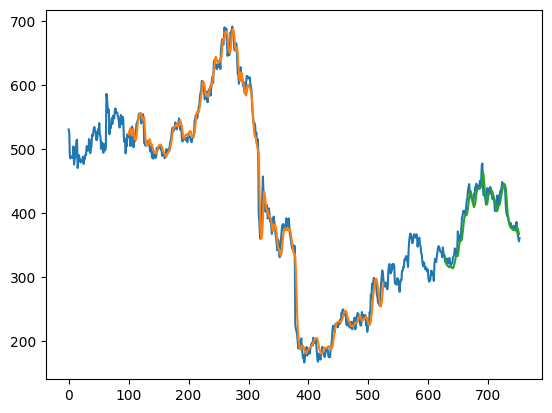

In [38]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_data)

226

In [40]:
x_input=test_data[126:].reshape(1,-1)
x_input.shape


(1, 100)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[0.37782686430216245,
 0.36669078358555646,
 0.4045343926906633,
 0.43137518651559753,
 0.43565829009059615,
 0.45069673122120396,
 0.4456331433803548,
 0.4514772154870545,
 0.4433869087342794,
 0.444300599424914,
 0.462575186099851,
 0.48284853159990154,
 0.4903677807192293,
 0.5127541544405714,
 0.5225195810979268,
 0.5309144717193306,
 0.5055775383784307,
 0.5107934467076181,
 0.4912815304215132,
 0.48753143338780164,
 0.49046293795545465,
 0.47508186186405804,
 0.4772519391213668,
 0.5015419125279954,
 0.4984961385641647,
 0.5218152580280462,
 0.5236237023807091,
 0.532113750238338,
 0.5186743268279899,
 0.5172656806882285,
 0.5241376538700915,
 0.521282251486759,
 0.5285920758772851,
 0.5406419062961749,
 0.5245183989346898,
 0.5400136854106148,
 0.5871278247355995,
 0.5924388883974105,
 0.5159712449329956,
 0.49708749242440337,
 0.49874361628872815,
 0.49746823558540004,
 0.4878931214968936,
 0.46980890640245493,
 0.49381329578791383,
 0.5189218045525534,
 0.518255532574833,
 0.5

In [43]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.36100528]
101
1 day input [0.36669078 0.40453439 0.43137519 0.43565829 0.45069673 0.44563314
 0.45147722 0.44338691 0.4443006  0.46257519 0.48284853 0.49036778
 0.51275415 0.52251958 0.53091447 0.50557754 0.51079345 0.49128153
 0.48753143 0.49046294 0.47508186 0.47725194 0.50154191 0.49849614
 0.52181526 0.5236237  0.53211375 0.51867433 0.51726568 0.52413765
 0.52128225 0.52859208 0.54064191 0.5245184  0.54001369 0.58712782
 0.59243889 0.51597124 0.49708749 0.49874362 0.49746824 0.48789312
 0.46980891 0.4938133  0.5189218  0.51825553 0.50127544 0.5037501
 0.50489227 0.52232927 0.51764637 0.49975252 0.50180845 0.48597047
 0.4976205  0.48985383 0.47414912 0.45044925 0.45336176 0.46051932
 0.46980891 0.49718265 0.45793039 0.47525318 0.47911749 0.50182744
 0.51073634 0.50885174 0.52065409 0.53740576 0.53184728 0.52685985
 0.52621257 0.53108579 0.51077439 0.46803851 0.44567119 0.43891343
 0.43407827 0.43750479 0.41865908 0.41456635 0.40630473 0.41580368
 0.40523872 0.40207873 0.39973728 

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

753

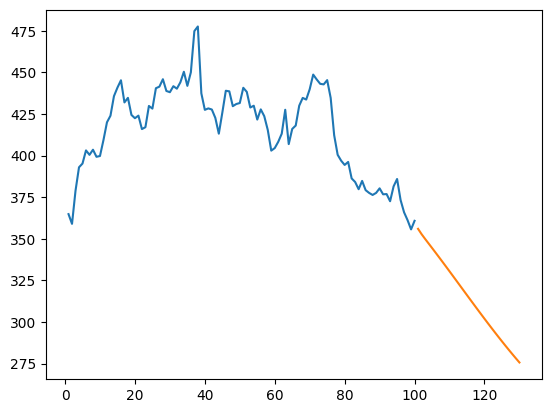

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[653:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

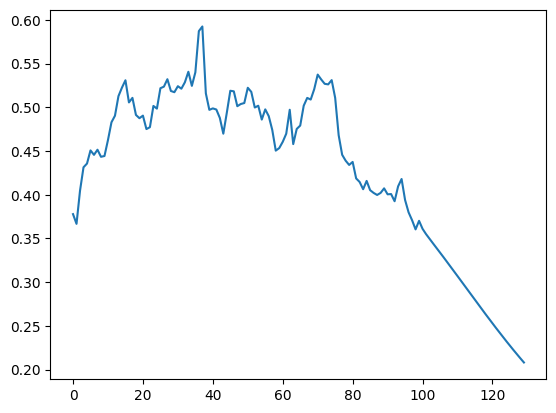

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[653:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

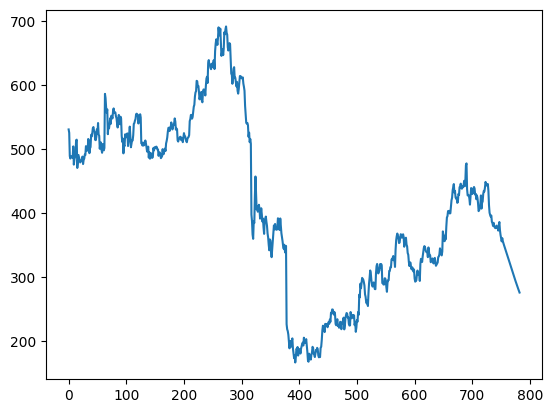

In [50]:
plt.plot(df3)

In [51]:
df4=scaler.inverse_transform(lst_output)
df4

array([[356.01328935],
       [352.82878329],
       [349.99509142],
       [347.24770973],
       [344.5023946 ],
       [341.73833953],
       [338.95247599],
       [336.14602513],
       [333.32091261],
       [330.47995647],
       [327.62635047],
       [324.7638207 ],
       [321.89629674],
       [319.02792736],
       [316.16246996],
       [313.30394806],
       [310.4557433 ],
       [307.62131561],
       [304.80371785],
       [302.00589331],
       [299.23069135],
       [296.48075777],
       [293.75877754],
       [291.06744346],
       [288.40923696],
       [285.78707784],
       [283.20340056],
       [280.66096838],
       [278.16244276],
       [275.71053999]])

In [52]:

import datetime
import pandas as pd

# initializing date
test_date = datetime.datetime.strptime("17-10-2023", "%d-%m-%Y")

# initializing K
K = 30

date_generated = pd.date_range(test_date, periods=K)
print(date_generated.strftime("%d-%m-%Y"))

Index(['17-10-2023', '18-10-2023', '19-10-2023', '20-10-2023', '21-10-2023',
       '22-10-2023', '23-10-2023', '24-10-2023', '25-10-2023', '26-10-2023',
       '27-10-2023', '28-10-2023', '29-10-2023', '30-10-2023', '31-10-2023',
       '01-11-2023', '02-11-2023', '03-11-2023', '04-11-2023', '05-11-2023',
       '06-11-2023', '07-11-2023', '08-11-2023', '09-11-2023', '10-11-2023',
       '11-11-2023', '12-11-2023', '13-11-2023', '14-11-2023', '15-11-2023'],
      dtype='object')


In [ ]:

# Create the pandas DataFrame
Final = pd.DataFrame(df4,index=date_generated, columns=['Predicted Price'])

# print dataframe.


In [55]:
Final

,Predicted Price
2023-10-17,356.013289
2023-10-18,352.828783
2023-10-19,349.995091
2023-10-20,347.247710
2023-10-21,344.502395
2023-10-22,341.738340
2023-10-23,338.952476
2023-10-24,336.146025
2023-10-25,333.320913
2023-10-26,330.479956
